# Real Estate Price Prediction
This notebook is a recap of what I was Learning about Machine Learning.

I am going to take data about Real Estates, get the Features and Output variables, and try to predict the price of a Real Estate.

In [146]:
import pandas as pd
estates = pd.read_csv("/content/Real estate.csv")
estates

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


**Dependent Variables** (Or Features : Variables that will help us to predict) : Transaction Date, House Age, Distance, Number of stores, Lat, Long

**Independent Variables** (The target what we want to predict) : House Price Of Unit Area

**Data Preparation** ;

1.   Let's first drop the column No since we will not use it

2.   Then let's Normalize the data since we have ranges so long between the attributes

3. Split data to training data and Testing data

**Note** : In this case we don't have a string values.

**Quick Reminder**: A Neural Network is good with numbers.

Neural network regression is a machine learning technique used for solving regression problems. In regression tasks, the goal is to predict a continuous numeric value (e.g., a price, a temperature, a score) based on input data. Neural networks, a type of deep learning model, can be used for regression by learning a mapping from input features to the target output.

If we have string we need to One-Hot Encoding them. For example if we have Sex : Male - Female we may have Sex_Male with 0 - 1 Values and Sex_Female with 0 - 1 Values


In [168]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


ct = make_column_transformer(
    (MinMaxScaler(),["X1 transaction date","X2 house age","X3 distance to the nearest MRT station","X4 number of convenience stores","X5 latitude","X6 longitude"])
)

X = estates.drop(["No","Y house price of unit area"],axis=1)
y = estates["Y house price of unit area"]

X_train, X_test, y_train, y_test = train_test_split(X,y)
ct.fit(X_train)
X_train_normalized = ct.transform(X_train)
X_test_normalized = ct.transform(X_test)
X_train_normalized

array([[0.09061135, 0.67579909, 0.13592046, 0.7       , 0.61488124,
        0.60594932],
       [0.90938865, 0.32876712, 0.02670918, 0.1       , 0.50436258,
        0.55343371],
       [0.18122271, 0.28995434, 0.02989794, 0.1       , 0.50666505,
        0.55367854],
       ...,
       [0.54585153, 0.60730594, 0.08369541, 0.5       , 0.51211827,
        0.66164769],
       [0.        , 0.07077626, 0.06567721, 0.5       , 0.59112942,
        0.72628229],
       [0.63646288, 0.42922374, 0.0669721 , 0.7       , 0.57149782,
        0.67670462]])

# Model Architecture
Let's now create a model. How-to ?
Neural Network is an Input Layer, Hidden Layers and an Output Layer

The goal is to find a pattern, a relationship betweend the Input Layer and The output layer. Not the same as the traditional developpement where we provide the Input, The pattern and we find the output.

**Input Layer** : The Features (X)
**Output Layer** : The target (Y) **Hidden Layers** Find the pattern

We need then to:


1.   Create the model
2.   Compile The Model
3.   Fit the Model
4.   Evaluate the model



4/4 [==============================] - 0s 4ms/step - loss: 6.8202 - mae: 6.8202
[6.820152282714844, 6.820152282714844]


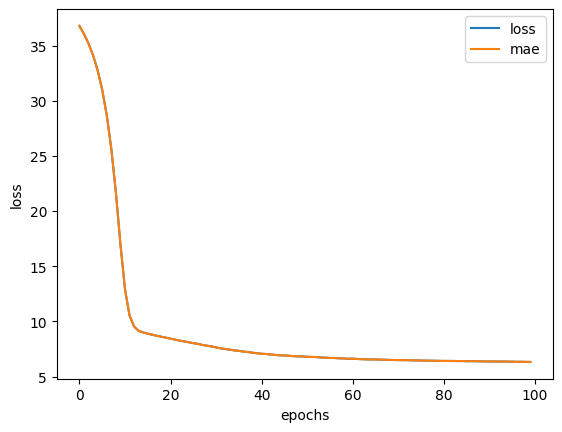

In [148]:
model_estates_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)]
)
model_estates_1.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"]
                        )
history = model_estates_1.fit(X_train_normalized,y_train,epochs = 100,verbose=0)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
print(model_estates_1.evaluate(X_test_normalized, y_test))


## Let's improve the model:
Since we have three steps of the creation of the model, we will have several ways to improve the model.

**During the creation** : By adding more data or by addin more nodes or more hidden layers

**During the Compilation** : By changing the optimizer, or even by changing the learning rate if we are using the Adam optimizer

**During the fit** : By adding more epochs and opportunities to learn.

**Imporvement Plan**:

1.   Adding more Hidden Layers
2.   Changing the optimizer By keeping the same hidden layers
3. Adding more epochs



4/4 [==============================] - 0s 8ms/step - loss: 5.6878 - mae: 5.6878
[5.687819480895996, 5.687819480895996]


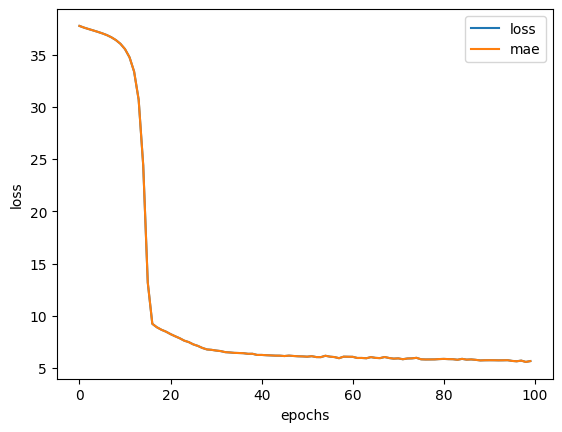

In [149]:
model_estates_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)]
)

model_estates_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"]
                        )

history_2 = model_estates_2.fit(X_train_normalized,y_train,epochs = 100,verbose=0)
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
print(model_estates_2.evaluate(X_test_normalized, y_test))

4/4 [==============================] - 0s 4ms/step - loss: 5.3526 - mae: 5.3526
[5.3525872230529785, 5.3525872230529785]


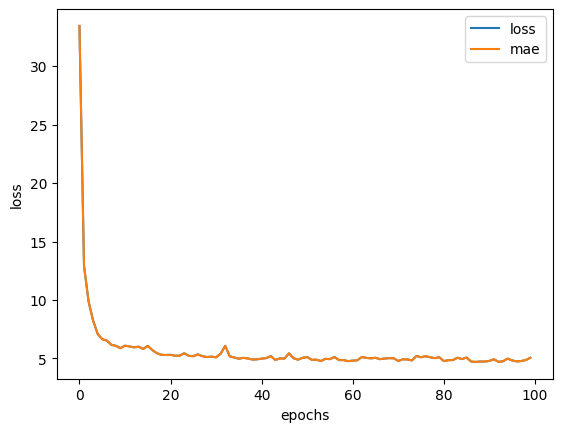

In [166]:
model_estates_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)]
)

model_estates_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                        metrics=["mae"]
                        )

history_3 = model_estates_3.fit(X_train_normalized,y_train,epochs = 100,verbose=0)
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
print(model_estates_3.evaluate(X_test_normalized, y_test))

4/4 [==============================] - 0s 4ms/step - loss: 4.9049 - mae: 4.9049
[4.904921054840088, 4.904921054840088]


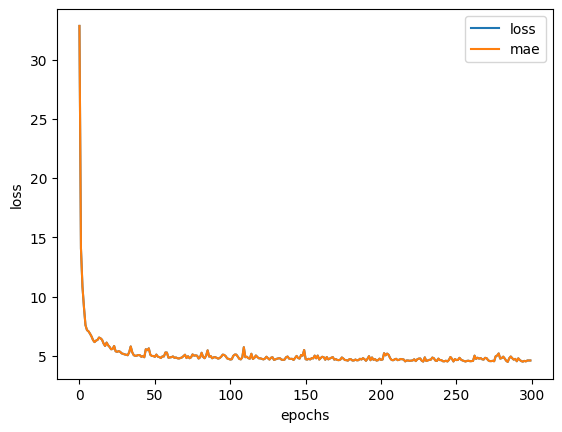

In [165]:
model_estates_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)]
)
model_estates_4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                        metrics=["mae"]
                        )
history = model_estates_4.fit(X_train_normalized,y_train,epochs = 300,verbose=0)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
print(model_estates_4.evaluate(X_test_normalized, y_test))

## Summary
As we can see after the four runs, the thirth model was the best performer with loss: `loss: 5.2317 - mae: 5.2317`

Let's now predict with the test data

4/4 [==============================] - 0s 3ms/step


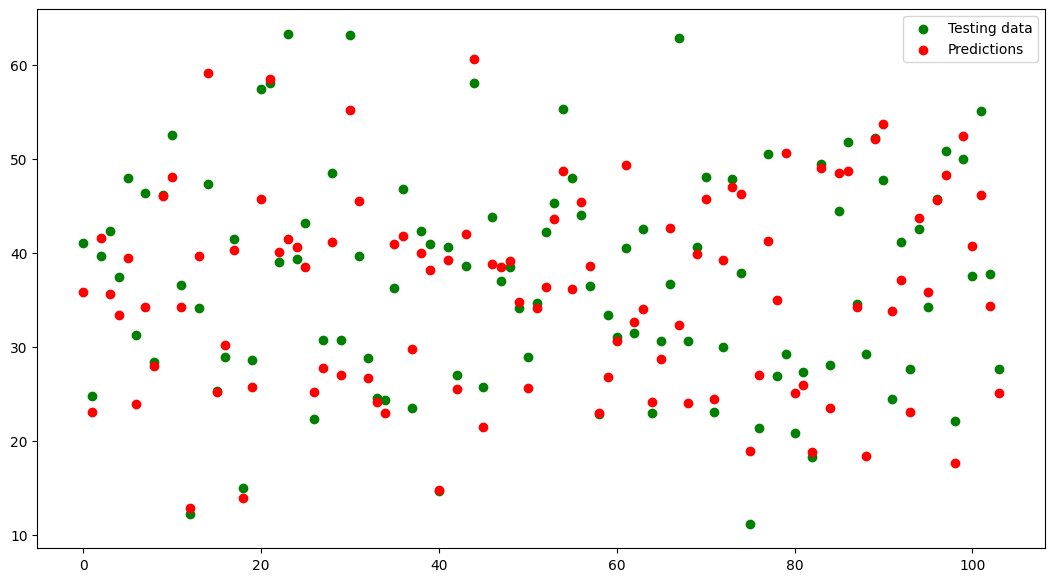

MAE: 4.433759518770072
MSE: 42.07869591514581
R2: 0.6805837821110529
None


In [174]:
def plot_predictions(test_X, test_Y, pred_Y):
  plt.figure(figsize=(13, 7))
  plt.scatter(test_X, test_Y, c="g", label="Testing data")
  plt.scatter(test_X, pred_Y, c="r", label="Predictions")
  plt.legend()
  plt.show()

def model_report(y_test, y_pred):
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"R2: {r2_score(y_test, y_pred)}")

y_predict = model_estates_4.predict(X_test_normalized)
plot_predictions(tf.range(0, len(y_test)),y_test,tf.squeeze(y_predict))
print(model_report(y_test,y_predict))
